# Capstone project
This is my submission for Udacity's *Machine Learning Engineer* Nanodegree.
## Data exploration
We'll start by exploring our data.<br>
We'll be working on two financial time-series.<br>
The firt one are the values of the shares of a ETF called "iShares Ibovespa Fundo de Índice" (ticker BOVA11). This ETF is indexed by IBOVESPA, which is Brazil's main financial index.<br>
The second time-series prwsents the prices for WEG's ordinary stocks (ticker WEGE3). WEG is one of the world leaders in the manufacturing of electrical motors, and one of Brazil's biggest companies. <br>
Both time series comprise data from January 1st, 2010 to October 14th, 2020.

In [2]:
# import relevant libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [3]:
# load data into pandas dataframes
orig_data_folder = 'orig-data'
bova_orig_path = os.path.join(orig_data_folder, "BOVA11.csv")
wege_orig_path = os.path.join(orig_data_folder, "WEGE3.csv")

bova_df = pd.read_csv(bova_orig_path)
wege_df = pd.read_csv(wege_orig_path)

Below, we can see what kinds of data we have available. <br>
Both datasets should have the same lenghts and columns.

In [4]:
bova_df.head()

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1]
0,16/10/2020,95.12,95.45,94.54,94.54,9.673009e+08,10188511,54.42,0.91
1,15/10/2020,94.36,95.80,94.05,95.34,9.081088e+08,9544784,59.67,1.75
2,14/10/2020,95.01,95.86,95.01,95.59,1.092614e+09,11431930,61.32,1.06
3,13/10/2020,94.10,95.35,93.65,94.80,9.415492e+08,9960394,58.07,1.70
4,09/10/2020,94.13,94.99,93.50,93.65,8.611634e+08,9149800,52.96,1.49


In [5]:
wege_df.head()

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1]
0,16/10/2020,81.06,83.36,80.91,82.05,525025471.0,6355600,2.59,89.56
1,15/10/2020,79.64,81.28,78.10,80.77,490407232.0,6096300,3.18,88.37
2,14/10/2020,79.26,80.98,79.26,80.58,527948834.0,6579000,1.83,88.19
3,13/10/2020,77.88,79.47,77.35,79.15,473625847.0,6030100,2.57,86.84
4,09/10/2020,74.94,77.18,74.55,76.90,438389500.0,5745100,2.63,84.34


Let's check how many entries we have for each dataframe and the first entry's date:
(keep in mind these dates are in the format dd/mm/yyyy) 

In [6]:
print(f'We have {len(bova_df)} entries for BOVA11 since the date of {bova_df["Date"].iloc[-1]}')
print(f'We have {len(wege_df)} entries for WEGE3 since the date of {wege_df["Date"].iloc[-1]}')

We have 2936 entries for BOVA11 since the date of 02/12/2008
We have 5660 entries for WEGE3 since the date of 04/07/1994


In [7]:
wege_df = wege_df.iloc[::-1]
wege_df.reset_index(drop=True, inplace=True) 
wege_df.head()

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1]
0,04/07/1994,0.03,0.03,0.03,0.03,267.0,3380,NaN,NaN
1,05/07/1994,0.03,0.03,0.03,0.03,1925.0,23660,0.0,NaN
2,06/07/1994,0.03,0.04,0.03,0.04,6195.0,74360,0.0,NaN
3,07/07/1994,0.04,0.04,0.04,0.04,393366.0,4495400,0.0,NaN
4,08/07/1994,0.04,0.04,0.04,0.04,152830.0,1666340,0.0,NaN


In [8]:
bova_df = bova_df.iloc[::-1]
bova_df.reset_index(drop=True, inplace=True) 
bova_df.head()

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1]
0,02/12/2008,35.11,35.81,34.91,35.39,26819970.0,759900,NaN,NaN
1,03/12/2008,34.73,35.40,33.90,35.31,11482717.0,330100,NaN,1.50
2,04/12/2008,35.80,36.00,35.15,35.70,4554168.0,128400,NaN,0.85
3,05/12/2008,34.51,35.35,34.11,35.35,6671196.0,193700,NaN,1.59
4,08/12/2008,37.35,38.46,36.95,38.46,3857295.0,103100,NaN,3.11


Because our dataset show the most recent data first, we should reverse de dataframes for plotting in a usual way.

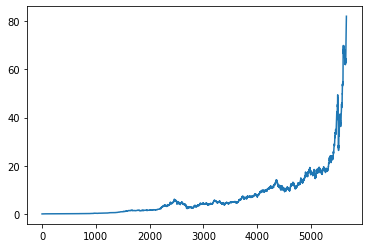

In [9]:
plt.plot(wege_df["Close"].values)

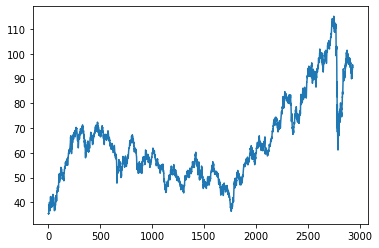

In [10]:
plt.plot(bova_df["Close"].values)

# Feature engineering

## Moving averages

In [11]:
def calculateMovingAverages(values, periods=21, exponential=False):
    '''
    
    '''
    moving_avgs = np.zeros(len(values))
    if not exponential:
        for i, value in enumerate(values):
            #just so we don't have empty entries in our df
            if i < periods: 
                moving_avgs[i] = sum(values[:i + 1])/(i + 1)
            else:
                moving_avgs[i] = sum(values[(i + 1 -periods):i + 1]) / periods
    else:
        K = 2 / (periods + 1)
        for i, value in enumerate(values):
            #just so we don't have empty entries in our df
            if i == 0:
                moving_avgs[i] - values[i]
            elif i < periods:
                moving_avgs[i] = (values[i] * (2 / (i + 1))) + (moving_avgs[i - 1] * (1 - (2 / (i + 1))))
            else:
                moving_avgs[i] = (values[i] * K) + (moving_avgs[i - 1] * (1 - K))
    return moving_avgs

In [12]:
wege_df["Moving Average A [21]"] = calculateMovingAverages(wege_df["Close"].values)
bova_df["Moving Average A [21]"] = calculateMovingAverages(bova_df["Close"].values)
wege_df["Moving Average E [9]"] = calculateMovingAverages(wege_df["Close"].values, periods=9, exponential=True)
bova_df["Moving Average E [9]"] = calculateMovingAverages(bova_df["Close"].values, periods=9, exponential=True)

In [13]:
wege_df.head(10)

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],Moving Average E [9]
0,04/07/1994,0.03,0.03,0.03,0.03,267.0,3380,NaN,NaN,0.030000,0.000000
1,05/07/1994,0.03,0.03,0.03,0.03,1925.0,23660,0.0,NaN,0.030000,0.030000
2,06/07/1994,0.03,0.04,0.03,0.04,6195.0,74360,0.0,NaN,0.033333,0.036667
3,07/07/1994,0.04,0.04,0.04,0.04,393366.0,4495400,0.0,NaN,0.035000,0.038333
4,08/07/1994,0.04,0.04,0.04,0.04,152830.0,1666340,0.0,NaN,0.036000,0.039000
5,11/07/1994,0.04,0.04,0.04,0.04,124000.0,1352000,0.0,NaN,0.036667,0.039333
6,12/07/1994,0.04,0.04,0.04,0.04,11780.0,128440,0.0,NaN,0.037143,0.039524
7,27/07/1994,0.04,0.04,0.04,0.04,6090.0,70980,0.0,NaN,0.037500,0.039643
8,28/07/1994,0.04,0.04,0.04,0.04,114020.0,1284400,0.0,72.6,0.037778,0.039722
9,03/08/1994,0.04,0.04,0.04,0.04,310.0,3380,0.0,75.9,0.038000,0.039778


In [14]:
bova_df.head(10)

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],Moving Average E [9]
0,02/12/2008,35.11,35.81,34.91,35.39,26819970.0,759900,NaN,NaN,35.390000,0.000000
1,03/12/2008,34.73,35.40,33.90,35.31,11482717.0,330100,NaN,1.50,35.350000,35.310000
2,04/12/2008,35.80,36.00,35.15,35.70,4554168.0,128400,NaN,0.85,35.466667,35.570000
3,05/12/2008,34.51,35.35,34.11,35.35,6671196.0,193700,NaN,1.59,35.437500,35.460000
4,08/12/2008,37.35,38.46,36.95,38.46,3857295.0,103100,NaN,3.11,36.042000,36.660000
5,09/12/2008,38.58,38.82,37.54,37.54,10449386.0,274500,NaN,1.28,36.291667,36.953333
6,10/12/2008,38.95,39.68,38.61,39.03,9367989.0,241100,NaN,2.14,36.682857,37.546667
7,11/12/2008,39.37,39.83,38.66,38.89,6451271.0,164200,NaN,1.17,36.958750,37.882500
8,12/12/2008,37.35,39.28,37.00,39.11,2449122.0,64400,77.76,2.28,37.197778,38.155278
9,15/12/2008,39.31,39.73,38.37,38.57,3122589.0,79900,71.96,1.36,37.335000,38.238222


## Local Peaks and Troughs


In [15]:
def FindLocalPeaks(df):
    max_values = df["Max"].values
    results = np.zeros(len(max_values))
    for i, price in enumerate(max_values):
        if i > 0 and i < len(max_values) - 1:
            price_previous = max_values[i - 1]
            price_current = price
            price_next = max_values[i + 1]
            if((price > price_previous) and (price > price_next)):
                results[i] = 1
    df["IsLocalPeak"] = results
       
def FindLocalTroughs(df):
    min_values = df["Min"].values
    results = np.zeros(len(min_values))
    for i, price in enumerate(min_values):
        if i > 0 and i < len(min_values) - 1:
            price_previous = min_values[i - 1]
            price_current = price
            price_next = min_values[i + 1]
            if((price < price_previous) and (price < price_next)):
                results[i] = 1
    df["IsLocalTrough"] = results

In [16]:
FindLocalPeaks(wege_df)
FindLocalTroughs(wege_df)
wege_df.tail(100)

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],Moving Average E [9],IsLocalPeak,IsLocalTrough
5560,27/05/2020,40.72,40.86,39.48,40.46,194857220.0,4847700,1.38,68.03,38.500476,38.531814,0.0,0.0
5561,28/05/2020,40.25,41.03,40.03,40.56,187897946.0,4619700,1.00,68.56,38.457619,38.937451,0.0,0.0
5562,29/05/2020,40.08,41.70,39.49,41.70,362255443.0,8774100,2.21,74.05,38.477619,39.489961,0.0,1.0
5563,01/06/2020,41.76,42.87,41.68,42.03,233660323.0,5511600,1.19,75.44,38.582857,39.997969,1.0,0.0
5564,02/06/2020,42.29,42.67,41.68,42.29,139793807.0,3305300,0.99,76.55,38.705238,40.456375,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,09/10/2020,74.94,77.18,74.55,76.90,438389500.0,5745100,2.63,84.34,66.217619,71.205888,0.0,0.0
5656,13/10/2020,77.88,79.47,77.35,79.15,473625847.0,6030100,2.57,86.84,67.031429,72.794711,0.0,0.0
5657,14/10/2020,79.26,80.98,79.26,80.58,527948834.0,6579000,1.83,88.19,67.854286,74.351768,0.0,0.0
5658,15/10/2020,79.64,81.28,78.10,80.77,490407232.0,6096300,3.18,88.37,68.650476,75.635415,0.0,1.0


In [17]:
FindLocalPeaks(bova_df)
FindLocalTroughs(bova_df)
bova_df.tail(100)

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],Moving Average E [9],IsLocalPeak,IsLocalTrough
2836,27/05/2020,83.44,85.00,82.71,84.68,8.240108e+08,9844800,75.13,2.55,78.010952,80.627227,1.0,0.0
2837,28/05/2020,84.23,84.86,83.47,83.65,1.079753e+09,12827420,68.83,1.39,78.265714,81.231781,0.0,0.0
2838,29/05/2020,83.59,84.18,82.15,84.15,1.076640e+09,12938580,70.19,2.03,78.454762,81.815425,0.0,1.0
2839,01/06/2020,83.60,85.74,83.48,85.33,6.296574e+08,7400780,73.30,2.26,78.841429,82.518340,0.0,0.0
2840,02/06/2020,86.00,87.78,85.99,87.78,8.950469e+08,10279210,78.53,2.45,79.397619,83.570672,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,09/10/2020,94.13,94.99,93.50,93.65,8.611634e+08,9149800,52.96,1.49,93.292381,92.710995,0.0,0.0
2932,13/10/2020,94.10,95.35,93.65,94.80,9.415492e+08,9960394,58.07,1.70,93.307619,93.128796,0.0,0.0
2933,14/10/2020,95.01,95.86,95.01,95.59,1.092614e+09,11431930,61.32,1.06,93.263810,93.621037,1.0,0.0
2934,15/10/2020,94.36,95.80,94.05,95.34,9.081088e+08,9544784,59.67,1.75,93.210476,93.964830,0.0,1.0


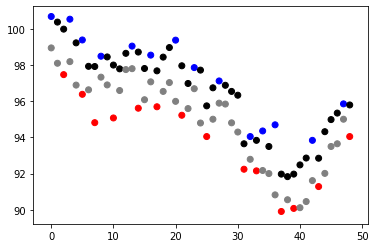

In [18]:
colorsPeak = ["blue" if x == 1 else "black" for x in bova_df["IsLocalPeak"][-50:-1]]
plt.scatter(range(0,49),bova_df["Max"].values[-50:-1] ,color=colorsPeak)
colorTrough = ["red" if x == 1 else "grey" for x in bova_df["IsLocalTrough"][-50:-1]]
plt.scatter(range(0,49),bova_df["Min"].values[-50:-1] ,color=colorTrough)

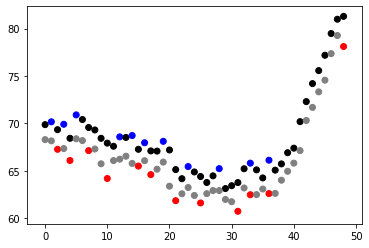

In [19]:
colorsPeak = ["blue" if x == 1 else "black" for x in wege_df["IsLocalPeak"][-50:-1]]
plt.scatter(range(0,49),wege_df["Max"].values[-50:-1] ,color=colorsPeak)
colorTrough = ["red" if x == 1 else "grey" for x in wege_df["IsLocalTrough"][-50:-1]]
plt.scatter(range(0,49),wege_df["Min"].values[-50:-1] ,color=colorTrough)

## First derivatives

In [20]:
def calc_derivatives(df, peaks=True):
    column_values = "Max" if peaks else "Min"
    column_bools = "IsLocalPeak" if peaks else "IsLocalTrough"
    values = df[column_values].values
    booleans = df[column_bools].values == 1
    derivatives = np.zeros(len(values))
    isFirst = True
    derivative = 0
    for i, value in enumerate(values):
        if booleans[i] and isFirst:
            isFirst = False
            previous_value = value
            previous_index = i
        elif not isFirst and booleans[i]:
            derivative = (value - previous_value) / (i - previous_index)
            previous_value = value
            previous_index = i
        derivatives[i] = derivative
    return derivatives

In [21]:
wege_df["derivative_peaks"] = calc_derivatives(wege_df, peaks=True)
wege_df["derivative_troughs"] = calc_derivatives(wege_df, peaks=False)

bova_df["derivative_peaks"] = calc_derivatives(bova_df, peaks=True)
bova_df["derivative_troughs"] = calc_derivatives(bova_df, peaks=False)

## Candlestick Patterns
### Bearish Harami
#### KEY TAKEAWAYS
A bearish harami is a candlestick chart indicator for reversal in a bull price movement.
It is generally indicated by a small decrease in price (signified by a black candle) that can be contained within the given equity's upward price movement (signified by white candles) from the past day or two.
Traders can use technical indicators, such as the relative strength index (RSI) and the stochastic oscillator with a bearish harami to increase the chance of a successful trade.

In [22]:
def calc_harami_bear(df):
    peak_derivatives = df["derivative_peaks"].values
    trough_derivatives = df["derivative_troughs"].values
    strenghts = np.zeros(len(df.index))
    for i in range(1, len(df.index)):
        strenght = 0
        prev_open = df.loc[i - 1, 'Open']
        prev_close = df.loc[i - 1, 'Close']
        curr_open = df.loc[i, 'Open']
        curr_close = df.loc[i, 'Close']
        if peak_derivatives[i] > 0 and trough_derivatives[i] > 0:
            if prev_open < prev_close: # previous candle is a bullish candle
                if curr_open > curr_close: # current candle is a bearish candle 
                    if prev_close > curr_open and prev_open < curr_close: # current body is "contained" in previous body
                        prev_body_size = prev_close - prev_open
                        curr_body_size = curr_open - curr_close
                        strenght = prev_body_size / curr_body_size
        strenghts[i] = strenght
    return strenghts

In [23]:
bear_harami_colname = "bear_harami"
wege_df[bear_harami_colname] = calc_harami_bear(wege_df)
bova_df[bear_harami_colname] = calc_harami_bear(bova_df)

### Bullish Harami
https://www.investopedia.com/terms/b/bullishengulfingpattern.asp#:~:text=A%20bullish%20engulfing%20pattern%20can,of%20the%20previous%20day's%20candlestick.

In [24]:
def calc_harami_bull(df):
    peak_derivatives = df["derivative_peaks"].values
    trough_derivatives = df["derivative_troughs"].values
    strenghts = np.zeros(len(df.index))
    for i in range(1, len(df.index)):
        strenght = 0
        prev_open = df.loc[i - 1, 'Open']
        prev_close = df.loc[i - 1, 'Close']
        curr_open = df.loc[i, 'Open']
        curr_close = df.loc[i, 'Close']
        if peak_derivatives[i] < 0 and trough_derivatives[i] < 0:
            if prev_open > prev_close: # previous candle is a bullish candle
                if curr_open < curr_close: # current candle is a bearish candle 
                    if prev_close < curr_open and prev_open > curr_close: # current body is "contained" in previous body
                        prev_body_size = - prev_close + prev_open
                        curr_body_size = -curr_open + curr_close
                        strenght = prev_body_size / curr_body_size
        strenghts[i] = strenght
    return strenghts

In [25]:
bull_harami_colname = "bull_harami"
wege_df[bull_harami_colname] = calc_harami_bull(wege_df)
bova_df[bull_harami_colname] = calc_harami_bull(bova_df)

### Bearish Engulfing
https://www.investopedia.com/terms/b/bearishengulfingp.asp

In [26]:
def calc_bear_engulfing(df):
    peak_derivatives = df["derivative_peaks"].values
    trough_derivatives = df["derivative_troughs"].values
    strenghts = np.zeros(len(df.index))
    for i in range(2, len(df.index)):
        strenght = 0
        prev_open = df.loc[i - 1, 'Open']
        prev_close = df.loc[i - 1, 'Close']
        curr_open = df.loc[i, 'Open']
        curr_close = df.loc[i, 'Close']
        if peak_derivatives[i] > 0 and trough_derivatives[i] > 0:
            if prev_open < prev_close: # previous candle is a bullish candle
                if curr_open > curr_close: # current candle is a bearish candle 
                    if prev_close < curr_open and prev_open > curr_close: # previous body is "contained" in current body
                        '''
                        Ideally, both candles are of substantial size relative to the price bars around them.
                        Two very small bars may create an engulfing pattern, but it is far less significant than if both candles are large.
                        '''
                        prev_body_size = prev_close - prev_open
                        curr_body_size = curr_open - curr_close
                        base_size = abs(df.loc[i - 2, 'Open'] - df.loc[i - 2, 'Close']) + 0.01 # avoid division by zero
                        strenght = (prev_body_size + curr_body_size) / base_size
        strenghts[i] = strenght
    return strenghts

In [27]:
bear_engulfing_colname = "bear_engulfing"
wege_df[bear_engulfing_colname] = calc_bear_engulfing(wege_df)
bova_df[bear_engulfing_colname] = calc_bear_engulfing(bova_df)

### Bulish Engulfing
https://www.investopedia.com/terms/b/bullishengulfingpattern.asp

In [28]:
def calc_bull_engulfing(df):
    peak_derivatives = df["derivative_peaks"].values
    trough_derivatives = df["derivative_troughs"].values
    strenghts = np.zeros(len(df.index))
    for i in range(2, len(df.index)):
        strenght = 0
        prev_open = df.loc[i - 1, 'Open']
        prev_close = df.loc[i - 1, 'Close']
        curr_open = df.loc[i, 'Open']
        curr_close = df.loc[i, 'Close']
        if peak_derivatives[i] < 0 and trough_derivatives[i] < 0:
            if prev_open > prev_close: # previous candle is a bullish candle
                if curr_open < curr_close: # current candle is a bearish candle 
                    if prev_close > curr_open and prev_open < curr_close: # previous body is "contained" in current body
                        '''
                        Ideally, both candles are of substantial size relative to the price bars around them.
                        Two very small bars may create an engulfing pattern, but it is far less significant than if both candles are large.
                        '''
                        prev_body_size = abs(prev_close - prev_open)
                        curr_body_size = abs(curr_open - curr_close)
                        base_size = abs(df.loc[i - 2, 'Open'] - df.loc[i - 2, 'Close']) + 0.000001 # avoid division by zero
                        strenght = (prev_body_size + curr_body_size) / base_size
        strenghts[i] = strenght
    return strenghts

In [29]:
bull_engulfing_colname = "bull_engulfing"
wege_df[bull_engulfing_colname] = calc_bull_engulfing(wege_df)
bova_df[bull_engulfing_colname] = calc_bull_engulfing(bova_df)

### Hammer
https://www.investopedia.com/terms/h/hammer.asp

In [30]:
def detect_hammers(df):
    peak_derivatives = df["derivative_peaks"].values
    trough_derivatives = df["derivative_troughs"].values
    hammer_detections = np.zeros(len(df.index))
    for i in range(len(df.index)):
        hammer_detected = 0
        curr_open = df.loc[i, 'Open']
        curr_close = df.loc[i, 'Close']
        curr_max = df.loc[i, "Max"]
        curr_min = df.loc[i, "Min"]
        if peak_derivatives[i] < 0 and trough_derivatives[i] < 0:
            body_size = abs(curr_open - curr_close) + 0.000001 # avoid division by zero
            lower_shadow = abs(min(curr_open, curr_close) - curr_min) + 0.000001 # avoid division by zero
            upper_shadow = abs(max(curr_open, curr_close) - curr_max) + 0.000001 # avoid division by zero
            if lower_shadow / body_size >= 5 and body_size / upper_shadow < 1:
                hammer_detected = 1
        hammer_detections[i] = hammer_detected
    return hammer_detections

In [31]:
hammer_colname = "hammer"
wege_df[hammer_colname] = detect_hammers(wege_df)
bova_df[hammer_colname] = detect_hammers(bova_df)

### Shooting Star

In [32]:
def detect_shooting_stars(df):
    peak_derivatives = df["derivative_peaks"].values
    trough_derivatives = df["derivative_troughs"].values
    hammer_detections = np.zeros(len(df.index))
    for i in range(len(df.index)):
        detected = 0
        curr_open = df.loc[i, 'Open']
        curr_close = df.loc[i, 'Close']
        curr_max = df.loc[i, "Max"]
        curr_min = df.loc[i, "Min"]
        if peak_derivatives[i] > 0 and trough_derivatives[i] > 0:
            body_size = abs(curr_open - curr_close) + 0.000001 # avoid division by zero
            lower_shadow = abs(min(curr_open, curr_close) - curr_min) + 0.000001 # avoid division by zero
            upper_shadow = abs(max(curr_open, curr_close) - curr_max) + 0.000001 # avoid division by zero
            if upper_shadow / body_size >= 5 and body_size / lower_shadow < 1:
                detected = 1
        hammer_detections[i] = detected
    return hammer_detections

In [33]:
shootin_star_colname = "shooting_star"
wege_df[shootin_star_colname] = detect_shooting_stars(wege_df)
bova_df[shootin_star_colname] = detect_shooting_stars(bova_df)

### Doji
https://www.investopedia.com/terms/d/doji.asp

In [34]:
wege_df.describe()

,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],Moving Average E [9],IsLocalPeak,IsLocalTrough,derivative_peaks,derivative_troughs,bear_harami,bull_harami,bear_engulfing,bull_engulfing,hammer,shooting_star
count,5660.000000,5660.000000,5660.000000,5660.000000,5.660000e+03,5.660000e+03,5659.000000,5652.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000
mean,7.189864,7.308733,7.080466,7.190986,2.421622e+07,1.696467e+06,0.239435,54.764418,7.061291,7.136648,0.154240,0.159187,0.006111,0.003583,0.028129,0.043797,0.058802,0.026635,0.016078,0.021731
std,10.367506,10.575458,10.195435,10.388577,6.375940e+07,2.378154e+06,0.494385,15.186430,9.984208,10.207024,0.361211,0.365883,0.134899,0.131706,0.448885,0.709980,1.141617,1.064473,0.125786,0.145818
min,0.030000,0.030000,0.030000,0.030000,2.670000e+02,3.380000e+03,0.000000,8.820000,0.030000,0.000000,0.000000,0.000000,-1.655000,-2.354000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.745000,0.757500,0.745000,0.750000,3.395825e+05,3.627585e+05,0.010000,44.115000,0.681548,0.716882,0.000000,0.000000,-0.010313,-0.007500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.170000,4.230000,4.100000,4.160000,4.826972e+06,1.147172e+06,0.110000,54.555000,4.180952,4.175921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.120000,10.302500,9.942500,10.092500,2.168816e+07,2.295858e+06,0.260000,65.400000,10.090000,10.141766,0.000000,0.000000,0.015000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,81.060000,83.360000,80.910000,82.050000,1.172040e+09,6.801033e+07,9.000000,95.270000,69.561905,76.918332,1.000000,1.000000,1.735000,1.953333,14.000000,25.000000,63.000000,76.992301,1.000000,1.000000


In [35]:
bova_df.describe()

,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],Moving Average E [9],IsLocalPeak,IsLocalTrough,derivative_peaks,derivative_troughs,bear_harami,bull_harami,bear_engulfing,bull_engulfing,hammer,shooting_star
count,2936.000000,2936.000000,2936.000000,2936.000000,2.936000e+03,2.936000e+03,2928.000000,2935.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,64.107006,64.664939,63.452142,64.074029,1.979881e+08,2.727684e+06,52.383282,1.344508,63.880718,63.983791,0.223433,0.228202,-0.000669,-0.000243,0.121997,0.093470,0.104939,0.046488,0.021458,0.028951
std,16.816599,16.888117,16.696268,16.793429,2.800640e+08,3.319674e+06,14.718881,0.875526,16.668438,16.748775,0.416617,0.419745,0.406351,0.485071,1.709891,1.120097,1.633899,1.003846,0.144929,0.167697
min,34.510000,35.350000,33.900000,35.310000,1.816440e+05,4.400000e+03,9.910000,0.170000,35.350000,0.000000,0.000000,0.000000,-3.292000,-5.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.110000,52.520000,51.500000,52.017500,4.614790e+07,8.376700e+05,41.467500,0.860000,51.992500,52.032207,0.000000,0.000000,-0.250000,-0.242500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.140000,60.685000,59.610000,60.150000,1.036209e+08,1.851050e+06,52.650000,1.160000,60.023095,60.131659,0.000000,0.000000,0.025833,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.717500,71.300000,70.012500,70.720000,2.164058e+08,3.348998e+06,63.395000,1.580000,70.753571,70.694999,0.000000,0.000000,0.247500,0.265000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.210000,115.260000,113.710000,115.210000,3.295958e+09,4.589951e+07,88.730000,15.760000,112.906667,113.664528,1.000000,1.000000,1.900000,2.673333,47.000000,36.000000,67.500000,46.331789,1.000000,1.000000


### Adjust dates
Since the dates are in brazilian date format, we will be converting then to american format

In [ ]:
def adjust_date(df):
    pass

# Add labels

For each of the given candles, the output should be the next days closing price

In [39]:
def addLabels(df, col_name, n_days=1):
    n = len(df.index)
    col_values = np.zeros(n)
    for i in range(n - 1):
        col_values[i] = df["Close"].iloc[i + n_days]
    df[col_name] = col_values
        

In [42]:
addLabels(wege_df, "D+1", 1)
addLabels(bova_df, "D+1", 1)

In [43]:
wege_df

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],...,IsLocalTrough,derivative_peaks,derivative_troughs,bear_harami,bull_harami,bear_engulfing,bull_engulfing,hammer,shooting_star,D+1
0,04/07/1994,0.03,0.03,0.03,0.03,267.0,3380,NaN,NaN,0.030000,...,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.03
1,05/07/1994,0.03,0.03,0.03,0.03,1925.0,23660,0.00,NaN,0.030000,...,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.04
2,06/07/1994,0.03,0.04,0.03,0.04,6195.0,74360,0.00,NaN,0.033333,...,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.04
3,07/07/1994,0.04,0.04,0.04,0.04,393366.0,4495400,0.00,NaN,0.035000,...,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.04
4,08/07/1994,0.04,0.04,0.04,0.04,152830.0,1666340,0.00,NaN,0.036000,...,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,09/10/2020,74.94,77.18,74.55,76.90,438389500.0,5745100,2.63,84.34,66.217619,...,0.0,0.103333,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,79.15
5656,13/10/2020,77.88,79.47,77.35,79.15,473625847.0,6030100,2.57,86.84,67.031429,...,0.0,0.103333,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,80.58
5657,14/10/2020,79.26,80.98,79.26,80.58,527948834.0,6579000,1.83,88.19,67.854286,...,0.0,0.103333,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,80.77
5658,15/10/2020,79.64,81.28,78.10,80.77,490407232.0,6096300,3.18,88.37,68.650476,...,1.0,0.103333,1.2925,0.0,0.0,0.0,0.0,0.0,0.0,82.05


In [44]:
bova_df

,Date,Open,Max,Min,Close,Volume [BRL],Volume [shares],IFR (RSI) [9],True Range [1],Moving Average A [21],...,IsLocalTrough,derivative_peaks,derivative_troughs,bear_harami,bull_harami,bear_engulfing,bull_engulfing,hammer,shooting_star,D+1
0,02/12/2008,35.11,35.81,34.91,35.39,2.681997e+07,759900,NaN,NaN,35.390000,...,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,35.31
1,03/12/2008,34.73,35.40,33.90,35.31,1.148272e+07,330100,NaN,1.50,35.350000,...,1.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,35.70
2,04/12/2008,35.80,36.00,35.15,35.70,4.554168e+06,128400,NaN,0.85,35.466667,...,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,35.35
3,05/12/2008,34.51,35.35,34.11,35.35,6.671196e+06,193700,NaN,1.59,35.437500,...,1.0,0.000000,0.1050,0.000000,0.0,0.0,0.0,0.0,0.0,38.46
4,08/12/2008,37.35,38.46,36.95,38.46,3.857295e+06,103100,NaN,3.11,36.042000,...,0.0,0.000000,0.1050,0.000000,0.0,0.0,0.0,0.0,0.0,37.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,09/10/2020,94.13,94.99,93.50,93.65,8.611634e+08,9149800,52.96,1.49,93.292381,...,0.0,-0.143333,0.3025,0.000000,0.0,0.0,0.0,0.0,0.0,94.80
2932,13/10/2020,94.10,95.35,93.65,94.80,9.415492e+08,9960394,58.07,1.70,93.307619,...,0.0,-0.143333,0.3025,0.000000,0.0,0.0,0.0,0.0,0.0,95.59
2933,14/10/2020,95.01,95.86,95.01,95.59,1.092614e+09,11431930,61.32,1.06,93.263810,...,0.0,0.404000,0.3025,0.000000,0.0,0.0,0.0,0.0,0.0,95.34
2934,15/10/2020,94.36,95.80,94.05,95.34,9.081088e+08,9544784,59.67,1.75,93.210476,...,1.0,0.404000,0.5540,0.000000,0.0,0.0,0.0,0.0,0.0,94.54


In [47]:
output_folder = "engineered-data"
wege_output_path = os.path.join(output_folder, "wege.csv")
bova_output_path = os.path.join(output_folder, "bova.csv")

In [49]:
wege_df.to_csv(wege_output_path, header=True, index=False)
bova_df.to_csv(bova_output_path, header=True, index=False)